In [23]:
# 準備
import pandas as pd
import numpy as np
from sklearn.metrics import r2_score
from matplotlib import pyplot as plt
from matplotlib.font_manager import FontProperties as fp
import matplotlib.dates as mdates
from sklearn.linear_model import LogisticRegression
import seaborn as sns

# matplotlib用ラベル日本語化設定
JP = fp(fname=r"C:\WINDOWS\Fonts\BIZ-UDGothicR.ttc", size=14)
JPFONT = {'family': 'BIZ UDGothic'}


In [24]:
# 【準備】Kaggleのタイタニック学習データを使用
df = pd.read_csv("./train.csv")
df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [25]:
# 「性別」を数値化
df['iSex'] = df['Sex'].map(lambda _: 1 if _ == 'male' else 0)
df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,iSex
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1


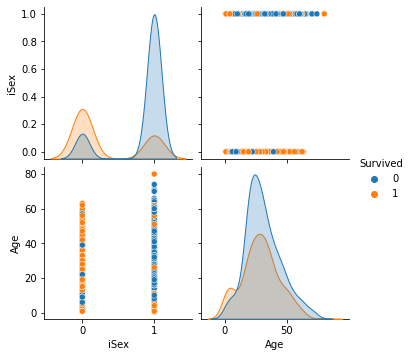

In [26]:
# 【確認】性別、年齢と生存の関係を表示
sns.pairplot(df, vars=['iSex', 'Age'], hue='Survived')
plt.show()


In [27]:
# 性別が「男性」で年齢が「NaN」でないものを抽出
df_male = pd.DataFrame(
    df.query("Sex in ['male'] and Age == Age"), columns=("Survived", "Age"))
df_male.head()


,Survived,Age
0,0,22.0
4,0,35.0
6,0,54.0
7,0,2.0
12,0,20.0


In [28]:
# ロジスティック回帰モデルのインスタンスを作成
lr = LogisticRegression()
# ロジスティック回帰モデルの重みを学習
X = df_male[['Age']]
Y = df_male['Survived']
lr.fit(X, Y)
print("係数 = ", lr.coef_)
print("切片 = ", lr.intercept_)


係数 =  [[-0.02141494]]
切片 =  [-0.72399328]


C:\Users\tamag\miniconda3\envs\j01\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


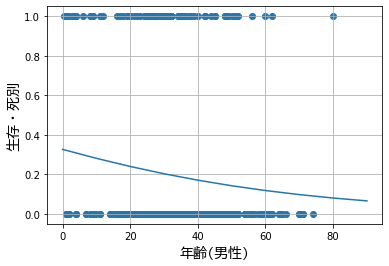

In [21]:
# 予測データを生成
X_data = np.arange(0, 100, 10)
X_test = X_data.reshape(-1, 1)

# predict_probaからはPositive確率のみを取り出す
Y_pred = lr.predict_proba(X_test)[:, 1]

fig, ax = plt.subplots()
ax.scatter(df_male.Age, df_male.Survived)
ax.plot(X_data, Y_pred)
ax.set_xlabel("年齢(男性)", fontproperties=JP)
ax.set_ylabel("生存・死別", fontproperties=JP)
ax.grid(True)
plt.show()


In [22]:
# 30歳に対する生存予測確率のみを出力
print(f"生存確率 = {(lr.predict_proba([[30]])[:, 1][0]):.2%}")


生存確率 = 20.32%


C:\Users\tamag\miniconda3\envs\j01\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
